This notebook is for postblast data parsing and preparing it for StructMan and thermostability checking tools.

In [31]:
import pandas as pd
import numpy as np

In [42]:
headers = ['qseqid', 'sseqid', 'pident', 'length', 'mismatch', 'gapopen', 'qstart', 'qend', 'sstart', 'send', 'evalue', 'bitscore']
#df = pd.DataFrame(columns=headers)
#df2 = pd.DataFrame(columns=headers)
df3 = pd.DataFrame(columns=headers)
with open('../bim.blast', 'r') as f:
	lines = f.readlines()
	if 'hits found' in line:
		start_idx = i+1
	if 'BLAST' in line:
		end_idx = i
		data = [line.split('\t') for line in lines[start_idx:end_idx]]
		temp_df = pd.DataFrame(data, columns=headers)
		df3 = pd.concat([df3, temp_df], ignore_index=True)
			
		   # take lines until 'BLAST' is found in line and put it in a new df with the headers

			

KeyboardInterrupt: 

In [2]:
import pandas as pd
from itertools import islice

headers = ['qseqid', 'sseqid', 'pident', 'length', 'mismatch', 'gapopen', 'qstart', 'qend', 'sstart', 'send', 'evalue', 'bitscore']

df3 = pd.DataFrame(columns=headers)
with open('../bim.blast', 'r') as f:
    start_idx = None
    for i, line in enumerate(f):
        if 'hits found' in line:
            start_idx = i+1
        elif 'BLAST' in line:
            end_idx = i
            data = [line.split('\t') for line in islice(f, start_idx, end_idx)]
            temp_df = pd.DataFrame(data, columns=headers)
            df3 = pd.concat([df3, temp_df], ignore_index=True)
            start_idx = None

In [3]:
df3

,qseqid,sseqid,pident,length,mismatch,gapopen,qstart,qend,sstart,send,evalue,bitscore
0,comp165306_c0_seq6,tr|A0A0L8G8Z6|A0A0L8G8Z6_OCTBM,72.455,334,43,2,481,1479,1,286,1.43e-152,444\n
1,# Query: comp130941_c0_seq1\n,None,None,None,None,None,None,None,None,None,None,None
2,# Database: User specified sequence set (Input...,None,None,None,None,None,None,None,None,None,None,None
3,"# Fields: query acc.ver, subject acc.ver, % id...",None,None,None,None,None,None,None,None,None,None,None
4,# 1 hits found\n,None,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...
5234268,comp178061_c1_seq1,tr|A0A0L8HI84|A0A0L8HI84_OCTBM,44.068,59,32,1,217,393,2,59,1.66e-09,52.0\n
5234269,comp178061_c1_seq1,tr|A0A0L8HJF1|A0A0L8HJF1_OCTBM,39.394,66,35,2,196,387,16,78,2.18e-09,52.8\n
5234270,comp178061_c1_seq1,tr|A0A0L8HJK4|A0A0L8HJK4_OCTBM,35.526,76,44,2,397,624,2,72,3.82e-09,51.6\n
5234271,comp178061_c1_seq1,tr|A0A0L8HUI3|A0A0L8HUI3_OCTBM,28.333,120,80,4,214,573,384,497,9.87e-07,48.5\n


In [4]:
#remove lines with # symbol in 1st column
df3 = df3[df3['qseqid'].str.contains('#') == False]

In [5]:
df3

,qseqid,sseqid,pident,length,mismatch,gapopen,qstart,qend,sstart,send,evalue,bitscore
0,comp165306_c0_seq6,tr|A0A0L8G8Z6|A0A0L8G8Z6_OCTBM,72.455,334,43,2,481,1479,1,286,1.43e-152,444\n
5,comp130941_c0_seq1,tr|A0A0L8GQ43|A0A0L8GQ43_OCTBM,100.000,144,0,0,1276,1707,1,144,3.99e-85,265\n
11,comp132291_c0_seq2,tr|A0A0L8HEW4|A0A0L8HEW4_OCTBM,99.829,586,1,0,687,2444,1,586,0.0,1132\n
12,comp132291_c0_seq2,tr|A0A0L8HSM1|A0A0L8HSM1_OCTBM,32.390,318,196,9,681,1610,7,313,1.11e-44,167\n
13,comp132291_c0_seq2,tr|A0A0L8H2D9|A0A0L8H2D9_OCTBM,27.554,323,219,6,729,1673,17,332,3.67e-31,127\n
...,...,...,...,...,...,...,...,...,...,...,...,...
5234267,comp178061_c1_seq1,tr|A0A0L8HJ47|A0A0L8HJ47_OCTBM,57.692,52,22,0,430,585,2,53,1.52e-13,68.2\n
5234268,comp178061_c1_seq1,tr|A0A0L8HI84|A0A0L8HI84_OCTBM,44.068,59,32,1,217,393,2,59,1.66e-09,52.0\n
5234269,comp178061_c1_seq1,tr|A0A0L8HJF1|A0A0L8HJF1_OCTBM,39.394,66,35,2,196,387,16,78,2.18e-09,52.8\n
5234270,comp178061_c1_seq1,tr|A0A0L8HJK4|A0A0L8HJK4_OCTBM,35.526,76,44,2,397,624,2,72,3.82e-09,51.6\n


In [6]:
df3['pident'] = df3['pident'].astype(float)
df3['evalue'] = df3['evalue'].astype(float)
df_filteredBim = df3[df3['pident'] > 95]
df_filtered2Bim = df_filteredBim[df_filteredBim['evalue'] < 0.00001]

df_filtered2Bim

/var/folders/lf/s1jn10250m5gyqc358vw8z3c0000gn/T/ipykernel_36350/3357492729.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['pident'] = df3['pident'].astype(float)
/var/folders/lf/s1jn10250m5gyqc358vw8z3c0000gn/T/ipykernel_36350/3357492729.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['evalue'] = df3['evalue'].astype(float)


,qseqid,sseqid,pident,length,mismatch,gapopen,qstart,qend,sstart,send,evalue,bitscore
5,comp130941_c0_seq1,tr|A0A0L8GQ43|A0A0L8GQ43_OCTBM,100.000,144,0,0,1276,1707,1,144,3.990000e-85,265\n
11,comp132291_c0_seq2,tr|A0A0L8HEW4|A0A0L8HEW4_OCTBM,99.829,586,1,0,687,2444,1,586,0.000000e+00,1132\n
31,comp133357_c0_seq2,tr|A0A0L8IAL6|A0A0L8IAL6_OCTBM,100.000,345,0,0,213,1247,1,345,0.000000e+00,692\n
43,comp167079_c0_seq1,tr|A0A0L8H3Q2|A0A0L8H3Q2_OCTBM,100.000,188,0,0,43,606,1,188,2.960000e-140,392\n
48,comp134050_c0_seq1,tr|A0A0L8GDI6|A0A0L8GDI6_OCTBM,100.000,518,0,0,1546,3099,3,520,0.000000e+00,1073\n
...,...,...,...,...,...,...,...,...,...,...,...,...
5234244,comp152009_c0_seq1,tr|A0A0L8HI26|A0A0L8HI26_OCTBM,100.000,220,0,0,1290,1949,9,228,5.440000e-160,460\n
5234245,comp152009_c0_seq1,tr|A0A0L8HI51|A0A0L8HI51_OCTBM,100.000,45,0,0,99,233,24,68,5.740000e-25,98.6\n
5234252,comp99962_c0_seq1,tr|A0A0L8GI10|A0A0L8GI10_OCTBM,100.000,86,0,0,1032,1289,1,86,1.250000e-55,184\n
5234260,comp178061_c1_seq1,tr|A0A0L8FYQ3|A0A0L8FYQ3_OCTBM,100.000,91,0,0,121,393,1,91,4.860000e-63,191\n


In [ ]:
df_filteredBim.to_csv('Obim_postBlast_filtered.csv', index=False)

In [48]:
csv = 'Obimaculoides_results.txt'

<AxesSubplot:title={'center':'Percent Identity of ORFs to O. bimaculoides'}, ylabel='Frequency'>

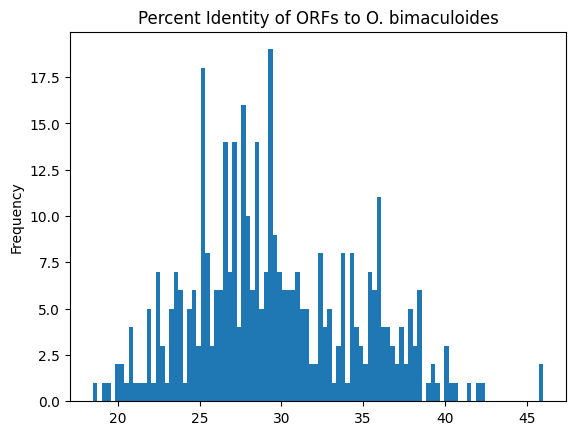

In [50]:
def blast_parser(csv):
    df = pd.read_csv(csv, sep='\t', header=None)
    headers = ['qseqid', 'sseqid', 'pident', 'length', 'mismatch', 'gapopen', 'qstart', 'qend', 'sstart', 'send', 'evalue', 'bitscore']
    df.columns = headers
    df_filtered = df[df['evalue'] < 0.00001]
    return df_filtered['pident'].plot(kind='hist', bins=100, title='Percent Identity of ORFs to O. bimaculoides')


blast_parser(csv)

In [10]:
df_filtered.head()

,qseqid,sseqid,pident,length,mismatch,gapopen,qstart,qend,sstart,send,evalue,bitscore
0,comp180239_c0_seq1,tr|A0A7E6FCQ6|A0A7E6FCQ6_OCTVU,97.251,582,16,0,493,2238,1,582,0.000000e+00,1141.0
1,comp180239_c0_seq1,tr|A0A7E6FCQ6|A0A7E6FCQ6_OCTVU,25.942,451,288,13,832,2121,226,651,3.980000e-18,89.7
2,comp180239_c0_seq1,tr|A0A7E6FBL3|A0A7E6FBL3_OCTVU,97.251,582,16,0,493,2238,1,582,0.000000e+00,1140.0
3,comp180239_c0_seq1,tr|A0A7E6FBL3|A0A7E6FBL3_OCTVU,25.942,451,288,13,832,2121,226,651,1.190000e-17,88.6
4,comp180239_c0_seq1,tr|A0A7E6FC89|A0A7E6FC89_OCTVU,59.114,587,238,2,484,2238,2,588,0.000000e+00,720.0


<AxesSubplot:title={'center':'Percent Identity of ORFs to O. vulgaris'}, ylabel='Frequency'>

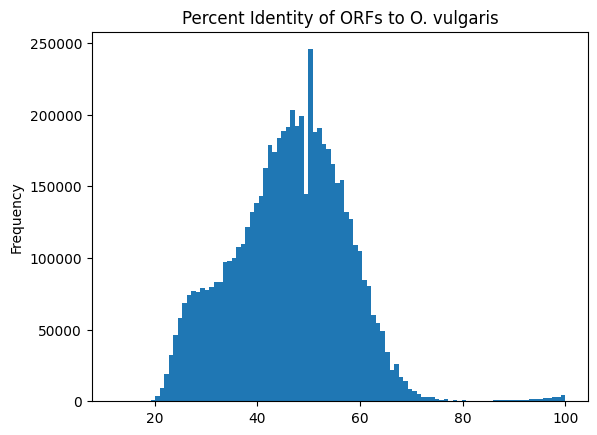

In [11]:
#build the plot, pident versus count
df_filtered['pident'].plot(kind='hist', bins=100, title='Percent Identity of ORFs to O. vulgaris')

In [40]:
df['pident'] = df['pident'].astype(float)
df['evalue'] = df['evalue'].astype(float)
df_filteredEntrez = df[df['pident'] > 95]
df_filtered2Ent = df_filteredEntrez[df_filteredEntrez['evalue'] < 0.00001]

df_filtered2Ent

,qseqid,sseqid,pident,length,mismatch,gapopen,qstart,qend,sstart,send,evalue,bitscore
132,comp49940_c0_seq1,AAU11097.1,96.310,271,10,0,52,864,1,271,2.720000e-169,471\n
216,comp132240_c0_seq1,QVQ68762.1,100.000,191,0,0,221,793,1,191,7.610000e-138,399\n
367,comp135703_c0_seq5,QVQ68776.1,98.101,158,3,0,676,1149,14,171,1.540000e-109,322\n
368,comp135703_c0_seq5,QVQ68776.1,97.727,44,1,0,1133,1264,166,209,3.460000e-11,57.0\n
706,comp129258_c0_seq1,ABA61315.1,99.322,295,2,0,204,1088,1,295,0.000000e+00,543\n
...,...,...,...,...,...,...,...,...,...,...,...,...
38390,comp141982_c1_seq1,sp|O02654.1|ENO_DORPE,99.536,431,2,0,3248,4540,1,431,0.000000e+00,837\n
38538,comp141966_c0_seq1,AAU11524.1,99.296,426,3,0,698,1975,1,426,0.000000e+00,849\n
38715,comp13106_c0_seq1,ABF06445.1,100.000,166,0,0,5,502,387,552,8.570000e-101,310\n
39199,comp140839_c1_seq15,QVQ68749.1,98.008,502,0,1,232,1737,1,492,0.000000e+00,848\n


In [1]:
#change df pident to float
df2['pident'] = df2['pident'].astype(float)
df2['evalue'] = df2['evalue'].astype(float)
df_filteredUni = df2[df2['pident'] > 95]
df_filtered2Uni = df_filteredUni[df_filteredUni['evalue'] < 0.00001]

df_filtered2Uni

NameError: name 'df2' is not defined

In [ ]:
#compare the two dataframes



To do (making a .smlf file):

1. for starters, leave only prots with | in name (uniprot)
2. in xlsx, check qstartqend mutations - are they the same with start send mutations?
3. create a final .smlf file: uniprot id (split by |, third piece), mutations in format P234D